## Some theory
In statistics, linear regression is a statistical model which estimates the linear relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). ~ 
[Wikipedia](https://en.wikipedia.org/wiki/Linear_regression) 


![linear regression](./linear_regression.jpg "Linear Regression") 


The graph above presents the liear relationshop between the dependent variable and independent variable. The blue line is referred to as the best-fit straight line. 
$$
    Y_{i} = \beta_{0} + \beta_{1}X_{i}
$$
where: $Y_{i}$ - dependent variable, $\beta_{0}$ - constant/intercept, $\beta_{1}$ - slope/intercept, $X_{i}$ - independent variable.


![linear regression symbols](./linear_regression_symbols.jpg "Linear regression symbols")


The goal of the algorithm is to get the best values for $\beta_{0}$ and $\beta_{1}$ and it is obtained by minimazing the random error (residual) $\epsilon_{i}$
$$
    \epsilon_{i} = y_{predicted} - y_{i}
$${epsilon_i}
Generally in linear regression *Mean Squarred Error (MSE)* as cost function is used.
So to obtain the best results one wants to minimaze the following function:
$$
    MSE = \frac{1}{N} \sum_{i=1}^{n} (y_{i} - (\beta{1}x_{i} + \beta_{0}))^2 
$${MSE}
To update those values we take their gradiends from the cost function. The gradients are obtained from partiar derivatives of MSE with respect to the parameters $\beta_0$, $\beta_1$:
$$
    \frac{\partial J}{\partial \beta_{0}} = \frac{2}{n} \sum_{i=1}^{n} (\beta_{0} + \beta_{1} * x_{i} - y_{i}) \\

    \frac{\partial J}{\partial \beta_{1}} = \frac{2}{n} \sum_{i=1}^{n} (\beta_{0} + \beta_{1} * x_{i} - y_{i}) * x_{i}
$$

One way to minimize the function is to apply batch gradient descent algorithm. The values are updated in each iteration by a quotient of _learning rate_ $\alpha$ and the calculated gradient:
$$
    \beta_{0} = \beta_{0} - \alpha \frac{\partial J}{\partial \beta_{0}} \\
    \beta_{1} = \beta_{1} - \alpha \frac{\partial J}{\partial \beta_{1}}
$$
The gradient value is substracted as we want to go away from the growth of the function to the local minimum. 
[source](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/)

The same analogy can be applied to multiple liear regression with data that has more dimmensions than two. Then the optimalization is need to be done accordingly for all parameters.
In n-space the partial derivative is calculated w.r.t. each parameter and then the values are adjusted just like above.
$$
   J' =  \begin{bmatrix} \frac{\partial J} {\partial \beta_{1}} \\ \frac{\partial J} {\partial \beta_{2}} 
   \\ \vdots \\ \frac{\partial J} {\partial \beta_{n}} \end{bmatrix}
$$

In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [17]:
# Metric for linear regression
def mse(y_test, y_pred):
    return np.mean((y_test - y_pred) ** 2)

class LinearRegression:
    def __init__(self, learning_rate = 0.001, n_iterations=1000) -> None:
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
        
            y_pred = self.predict(X)
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
        
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
    
    def calculate_mse(self, X, y):
        y_pred = self.predict(X)
        metric = mse(y, y_pred)
        return metric
    
    

In [19]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1234)
lr = LinearRegression(learning_rate=0.01, n_iterations=2000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
lr.fit(X_train, y_train)
print(y_test)
print("MSE: ")
print(lr.calculate_mse(X_test, y_test))

[  20.50476935  142.7546496     9.84617977  -91.54741375  -27.30975983
   50.5672884    46.61433976  -34.92302734 -289.12699629  -26.36081393
  171.25986261   88.76973989 -197.98015036  -24.66035565   68.80268857
  -80.54746507   43.02438483   99.41132308  187.11855381 -138.96811403]
MSE: 
375.5456207849615


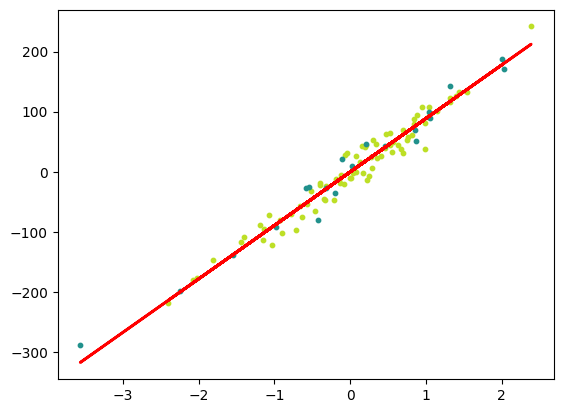

In [22]:
cmap = plt.get_cmap('viridis')
training_points = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
testing_points = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, lr.predict(X), color='red', linewidth=2, label="Prediction")
plt.show()
